# Aykırı değerleri yakalamak 

## Boxplot yönemi  ile aykırı değer yakalamak.

In [126]:
import pandas as pd
import seaborn as sns
df = sns.load_dataset("exercise")
df = df.select_dtypes(["float64", "int64"])
df = df.dropna()
df

,Unnamed: 0,id,pulse
0,0,1,85
1,1,1,85
2,2,1,88
3,3,2,90
4,4,2,92
...,...,...,...
85,85,29,135
86,86,29,130
87,87,30,99
88,88,30,111


In [127]:
df_p = df["pulse"]

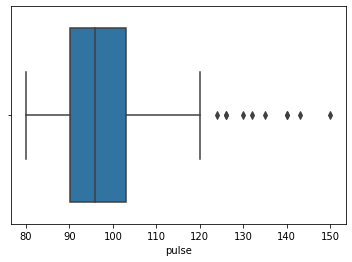

In [128]:
sns.boxplot(x = df_p)  #boxplot grafiği seaborn kütüphanesinden 

In [129]:
Q1 = df_p.quantile(0.25)   #verileri küçükten büyüğe doğru sıralar ve %25.ci değere karşılık gelen elemanı ele alır.
Q1

90.25

In [130]:
Q3 = df_p.quantile(0.75)  #büyükten küçüğe göre sıralandıktan sonra  %75.ci değere karşılık gelen eleman

In [131]:
IQR = 1.5*(Q3-Q1)  #interquartile range (IQR)
IQR

19.125

In [132]:
alt_sinir = Q1-IQR

In [133]:
ust_sinir = Q3 + IQR

In [134]:
alt_sinir, ust_sinir

(71.125, 122.125)

In [138]:
aykiri_ob = (df_p < alt_sinir) | (df_p > ust_sinir)   #oluşturulan sınır değerlerinin koşulları

df_p[aykiri_ob]   #aykırı gözlemler ekranımızda boxplot yöntemi kullanılarak gerçekleştirildi.

In [141]:
df_p[aykiri_ob]

70    132
76    126
77    143
79    126
80    140
82    124
83    140
85    135
86    130
89    150
Name: pulse, dtype: int64

In [136]:
df_p[aykiri_ob].index   #aykırı gözlemlerin index değerleriiaa

Int64Index([70, 76, 77, 79, 80, 82, 83, 85, 86, 89], dtype='int64')